In [1]:
import pandas as pd
import numpy as np

# Reading Excel File

In [2]:
df = pd.read_excel("preprocessed data.xlsx")

In [3]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade
0,0,2,1,60,3
1,0,1,1,55,2
2,0,1,1,33,3
3,0,1,1,67,2
4,0,1,1,47,2
...,...,...,...,...,...
229,1,2,2,55,2
230,1,3,2,45,2
231,1,3,2,37,3
232,1,3,2,58,2


# Anomaly Detection

In [4]:
from pycaret.anomaly import *
#intialize the setup
exp_ano = setup(df)


Setup Succesfully Completed!


,Description,Value
0,session_id,5378
1,Original Data,"(234, 5)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(234, 13)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [5]:
knn = create_model('knn')

In [6]:
knn_df = assign_model(knn)
knn_df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [7]:
plot_model(knn)

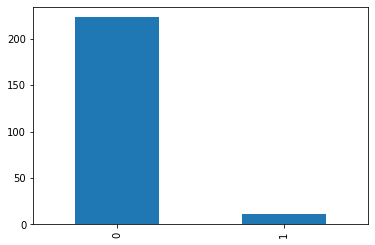

In [8]:
knn_df['Label'].value_counts().plot.bar()

In [9]:
knn_df['Label'].value_counts()

0    223
1     11
Name: Label, dtype: int64

# Separating Anomaly Label 0 and 1

In [10]:
df = knn_df.loc[knn_df['Label'] == 0] 

In [11]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [12]:
raw = knn_df.loc[knn_df['Label'] == 1] 

In [13]:
raw

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
7,0,1,1,26,2,1,2.828427
25,0,2,0,30,2,1,2.828427
71,0,2,0,25,3,1,3.316625
76,0,1,1,72,2,1,4.242641
117,0,2,1,29,3,1,3.000000
147,0,2,1,25,3,1,3.000000
149,0,2,1,28,3,1,2.828427
171,0,2,2,30,2,1,2.828427
174,0,3,1,70,3,1,3.162278
190,0,2,3,73,3,1,5.196152


In [14]:
df = df.drop(["Label"],axis=1)

In [15]:
df


,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Score
0,0,2,1,60,3,1.414214
1,0,1,1,55,2,2.000000
2,0,1,1,33,3,2.449490
3,0,1,1,67,2,2.236068
4,0,1,1,47,2,1.732051
...,...,...,...,...,...,...
229,1,2,2,55,2,2.236068
230,1,3,2,45,2,2.236068
231,1,3,2,37,3,2.236068
232,1,3,2,58,2,2.449490


In [16]:
columns = df.columns


0    223
1     11
Name: Label, dtype: int64

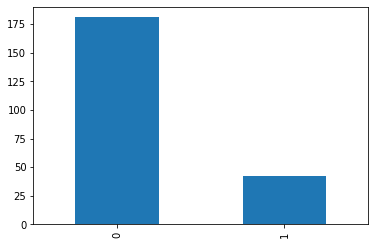

In [17]:
df['target'].value_counts().plot.bar()
knn_df['Label'].value_counts()


# Splitting Dependent and Independent coloumns

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

# Appling Data Balancing Techinque using RandomOversampler

In [20]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [21]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [22]:
X_res.shape

(362, 5)

In [23]:
y_res.shape

(362,)

In [24]:
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

In [25]:
df = pd.concat([y,x],axis=1)

In [26]:
df

,0,0,1,2,3,4
0,0,2.0,1.0,60.0,3.0,1.414214
1,0,1.0,1.0,55.0,2.0,2.000000
2,0,1.0,1.0,33.0,3.0,2.449490
3,0,1.0,1.0,67.0,2.0,2.236068
4,0,1.0,1.0,47.0,2.0,1.732051
...,...,...,...,...,...,...
357,1,1.0,1.0,52.0,3.0,2.000000
358,1,2.0,2.0,50.0,3.0,2.236068
359,1,1.0,2.0,64.0,1.0,2.645751
360,1,2.0,1.0,63.0,3.0,2.000000


In [27]:
df.columns = columns

In [28]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Score
0,0,2.0,1.0,60.0,3.0,1.414214
1,0,1.0,1.0,55.0,2.0,2.000000
2,0,1.0,1.0,33.0,3.0,2.449490
3,0,1.0,1.0,67.0,2.0,2.236068
4,0,1.0,1.0,47.0,2.0,1.732051
...,...,...,...,...,...,...
357,1,1.0,1.0,52.0,3.0,2.000000
358,1,2.0,2.0,50.0,3.0,2.236068
359,1,1.0,2.0,64.0,1.0,2.645751
360,1,2.0,1.0,63.0,3.0,2.000000


# Compare Models Using pycaret

In [29]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.91,0.9712,0.9769,0.8768,0.9196,0.8201
1,Random Forest Classifier,0.9097,0.964,0.9769,0.8723,0.9186,0.8191
2,Extra Trees Classifier,0.9097,0.9884,0.9769,0.8774,0.9193,0.8192
3,Gradient Boosting Classifier,0.9055,0.9523,0.9449,0.8892,0.9111,0.8111
4,Decision Tree Classifier,0.8977,0.8974,0.9846,0.8476,0.9086,0.7952
5,Light Gradient Boosting Machine,0.8858,0.9298,0.9769,0.8378,0.8984,0.7719
6,Ada Boost Classifier,0.8854,0.948,0.9224,0.8644,0.8914,0.7704
7,Extreme Gradient Boosting,0.8623,0.958,0.9058,0.8508,0.8708,0.725
8,Logistic Regression,0.8225,0.8831,0.825,0.8321,0.8241,0.6445
9,Linear Discriminant Analysis,0.8186,0.8847,0.8269,0.8249,0.8192,0.6376


# Tunening Xg_Boost  Model

In [49]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# tuning LightGBM Model
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8462,0.9586,1.0000,0.7647,0.8667,0.6923
1,0.8462,0.8994,0.9231,0.8000,0.8571,0.6923
2,0.9231,0.9527,1.0000,0.8667,0.9286,0.8462
3,0.8400,0.8782,0.9231,0.8000,0.8571,0.6774
4,0.8400,0.8942,0.9231,0.8000,0.8571,0.6774
5,0.8000,0.9487,0.7692,0.8333,0.8000,0.6006
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9600,0.9872,1.0000,0.9231,0.9600,0.9201
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8800,0.9679,0.9167,0.8462,0.8800,0.7604


# Getting Best Xg_Boost Model Hyperparameter

In [50]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.68, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3824,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=0)

# Getting Best Random Forest Model Hyperparameter

In [39]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# tuning LightGBM Model
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9615,1.0000,1.0000,0.9286,0.9630,0.9231
1,0.9231,1.0000,1.0000,0.8667,0.9286,0.8462
2,0.9615,0.9941,0.9231,1.0000,0.9600,0.9231
3,0.9200,0.9487,0.9167,0.9167,0.9167,0.8397
4,0.9200,0.9167,1.0000,0.8571,0.9231,0.8408
5,0.8800,0.9423,0.9167,0.8462,0.8800,0.7604
6,0.9200,0.9808,1.0000,0.8571,0.9231,0.8408
7,0.9200,1.0000,0.8462,1.0000,0.9167,0.8408
8,0.9600,0.9936,1.0000,0.9286,0.9630,0.9196
9,0.8800,0.9487,1.0000,0.8125,0.8966,0.7573


In [40]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

# Spliting Training and Test Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

# RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1575,
                       verbose=0, warm_start=False)

In [44]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8493150684931506
[[29 11]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.75      1.00      0.86        33

    accuracy                           0.85        73
   macro avg       0.88      0.86      0.85        73
weighted avg       0.89      0.85      0.85        73



# XGBClassifier

In [51]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.68, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3824,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=0)

In [52]:
xgb_model.fit(X_train,y_train)


y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9541284403669725
[[49  5]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.92      1.00      0.96        55

    accuracy                           0.95       109
   macro avg       0.96      0.95      0.95       109
weighted avg       0.96      0.95      0.95       109



# Plot Model Area Under the Curve

In [53]:
from pycaret.classification import *

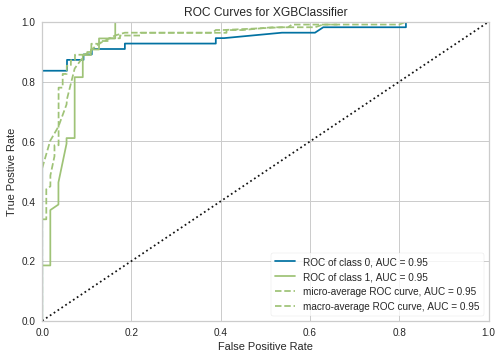

In [55]:
xgboost = create_model('xgboost')
# plotting a model
plot_model(xgboost)

# Cross Validation 

# cross_val_score

In [56]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_model,X_res,y_res,cv=10)

In [57]:

score

array([0.67567568, 0.94594595, 0.97222222, 0.91666667, 0.88888889,
       0.88888889, 1.        , 0.91666667, 0.97222222, 0.83333333])

In [58]:
score.mean()

0.901051051051051

In [59]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)

# StratifiedKFold Cross Validation

In [60]:
from sklearn.model_selection import StratifiedKFold


accuracy = []

skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    print("Train:", train_index,"Val",test_index)
    X1_train , X1_test = X_res.iloc[train_index],X_res.iloc[test_index]
    y1_train , y1_test = y_res.iloc[train_index],y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    prediction = model.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)

Train: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281

Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262

In [61]:
np.array(accuracy).mean()

0.8841591591591591

# NestedCV Cross Validation

In [62]:
from nested_cv import NestedCV

In [63]:
from sklearn.metrics import roc_auc_score

In [68]:
param_grid = {
     'max_depth': [3, None],
     'n_estimators': [10, 20]
}

NCV = NestedCV(model=RandomForestClassifier(), params_grid=param_grid,
               outer_kfolds=10, inner_kfolds=10,
               cv_options={'metric':roc_auc_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':True})
NCV.fit(X=X_res,y=y_res)

accuracy = NCV.outer_scores
accuracy

[0.9649122807017544,
 0.9803030303030303,
 0.9024767801857585,
 0.8862876254180602,
 1.0,
 0.834375,
 0.99375,
 0.998263888888889,
 1.0,
 0.973015873015873]

In [66]:
np.array(accuracy).mean()

0.9862757955277628